<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="250px">




# <center> **06. DATA ANALYSIS: STATISTIC TO DISCRIMINATE CLASSES** </center>



## **Outline**
1. **Understanding problems from data**
2. **Discriminating/classify from variable modelling**
3. **CLT-again discr**






In [ ]:
#@title *Execute this cell*
#@markdown Please include your student id
import sys
import inspect

group_id = "IA1-20231-H1" #@param {type:"string"}
assignment_id = group_id +'.20221.python'
code_subject = '5'
student_id = "2218109" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
"""

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [ ]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name', 'course_name', 'student_id'])
config = Config(server_name='https://azuregrader.azurewebsites.net/api', 
                course_name='ai1', student_id='2162107')


def check_solution(assignment_id, student_func_str):

    # Set the endpoint and payload.
    payload = {'func_str': student_func_str, 'assignment_id': assignment_id}
    endpoint_url = config.server_name + '/CheckSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.get(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "course-AI/ai-uis-student" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/course-AI/ai-uis-student


In [ ]:
#@title **Load libs** { display-mode: "form" }
#@markdown **SciPy** contains additional routines needed in scientific work: for example, routines for computing integrals numerically, solving differential equations, optimization, and sparse matrices.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set_theme()
pd.__version__

'1.3.5'

#**1. Understanding problems from data**

we can obtain a dataset of a set of patients diagnosed with breast cancer and control patients. Each patient is characterized by an histological analysis, by measuring geometrical properties in the nuclei. See an image example of sample, where nuclei is characterized: 


<center> <img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/imagenBreast.jpg" width="240" > </center>

We going to load a related dataset, and then we going to analyze with statistical tools. 

In [ ]:
#@title **code**
data_breast = pd.read_csv('data/breast_cancer.csv')
data_breast.diagnosis.replace(to_replace='M', value=1, inplace=True)
data_breast.diagnosis.replace(to_replace='B', value=0, inplace=True)
print(data_breast.shape)
data_breast = data_breast.sample(frac=1)

data_breast.head(10)

(569, 33)


id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
539   921362          0        7.691         25.44           48.34      170.4   
209  8810436          0       15.270         12.91           98.17      725.5   
380   901549          0       11.270         12.96           73.16      386.3   
333   897137          0       11.250         14.78           71.38      390.0   
317   894326          1       18.220         18.87          118.70     1027.0   
72    859717          1       17.200         24.52          114.20      929.4   
378  9013594          0       13.660         15.15           88.27      580.6   
74   8610175          0       12.310         16.52           79.19      470.9   
522    91789          0       11.260         19.83           71.30      388.1   
253  8860702          1       17.300         17.08          113.00      928.2   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
539          0.08668           0.11990        0.092520             0.013640   
209          0.08182           0.06230        0.058920             0.031570   
380          0.12370           0.11110        0.079000             0.055500   
333          0.08306           0.04458        0.000974             0.002941   
317          0.09746           0.11170        0.113000             0.079500   
72           0.10710           0.18300        0.169200             0.079440   
378          0.08268           0.07548        0.042490             0.024710   
74           0.09172           0.06829        0.033720             0.022720   
522          0.08511           0.04413        0.005067             0.005664   
253          0.10080           0.10410        0.126600             0.083530   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
539  ...          31.89            54.49       223.6            0.1596   
209  ...          15.92           113.70       932.7            0.1222   
380  ...          20.53            84.93       476.1            0.1610   
333  ...          22.06            82.08       492.7            0.1166   
317  ...          25.00           140.90      1485.0            0.1434   
72   ...          33.82           151.60      1681.0            0.1585   
378  ...          19.64            97.96       657.0            0.1275   
74   ...          23.21            89.71       611.1            0.1176   
522  ...          26.43            76.38       435.9            0.1108   
253  ...          25.09           130.90      1222.0            0.1416   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
539            0.30640         0.339300               0.05000          0.2790   
209            0.21860         0.296200               0.10350          0.2320   
380            0.24290         0.224700               0.13180          0.3343   
333            0.09794         0.005518               0.01667          0.2815   
317            0.27630         0.385300               0.17760          0.2812   
72             0.73940         0.656600               0.18990          0.3313   
378            0.31040         0.256900               0.10540          0.3387   
74             0.18430         0.170300               0.08660          0.2618   
522            0.07723         0.025330               0.02832          0.2557   
253            0.24050         0.337800               0.18570          0.3138   

     fractal_dimension_worst  Unnamed: 32  
539                  0.10660          NaN  
209                  0.07474          NaN  
380                  0.09215          NaN  
333                  0.07418          NaN  
317                  0.08198          NaN  
72                   0.13390          NaN  
378                  0.09638          NaN  
74                   0.07609          NaN  
522                  0.07613          NaN  
253                  0.08113          NaN  

[10 rows x 33 columns]

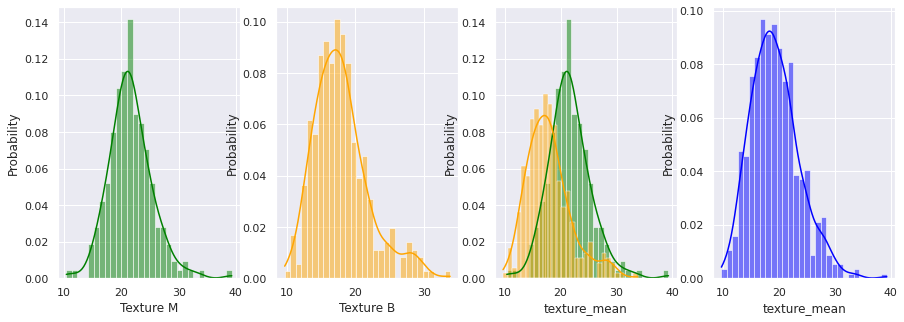

In [ ]:
#@title **code:** do these distributions look familiar?
plt.figure(figsize=(15,5))
plt.subplot(1,4, 1);
ax=sns.histplot(data_breast.texture_mean[data_breast.diagnosis ==1], kde=True, color='green', bins=30, stat='probability');
ax.set(xlabel="Texture M")
plt.subplot(1,4, 2);
ax=sns.histplot(data_breast.texture_mean[data_breast.diagnosis ==0], kde=True, color='orange', bins=30, stat='probability');
ax.set(xlabel="Texture B")
plt.subplot(1,4, 3);
sns.histplot(data_breast.texture_mean[data_breast.diagnosis ==1], kde=True, color='green', bins=30, stat='probability');
sns.histplot(data_breast.texture_mean[data_breast.diagnosis ==0], kde=True, color='orange', bins=30, stat='probability');
plt.subplot(1,4, 4);
sns.histplot(data_breast.texture_mean, kde=True, color='blue', bins=30, stat='probability');


<AxesSubplot:>

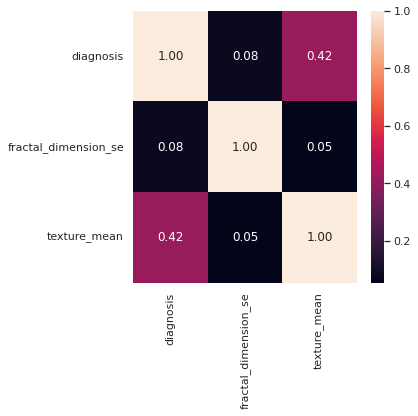

In [ ]:
#@title **code** we can compute the correlation  
#@markdown  we can compute analytically correlations
plt.subplots(figsize=(5,5)) #Importante para que se vean todas las correlaciones
corr = data_breast[['diagnosis', 'fractal_dimension_se', 'texture_mean']].corr()
sns.heatmap(corr, annot=True, fmt=".2f")

In [ ]:
#@markdown **full correlation**
plt.subplots(figsize=(25,15)) 
corr = data_breast.corr()
sns.heatmap(corr, annot=True, fmt=".2f")

**In summary**. The distributions provide a parameterized mathematical function that can be used to calculate the probability from a observable population: 
- Some known distributions are: the uniform, the normal (famous), the Poisson (temporal), the Bernoulli (binary)
- For instance, the distribution of texture of nucleui in breast cancer.
- The distribution can be analized from PDF (Probability Density function) and CDF (Cumulative Density function)
  - PDF. The probability of observing a given value.
  - CDF. The probability of an observation equal or less than a value.



In [ ]:
#@title **code**
#CDF= cumulative distribution function
import numpy as np
import scipy.stats as stats


text_m = data_breast.texture_mean[data_breast.diagnosis ==1]
text_b   = data_breast.texture_mean[data_breast.diagnosis ==0]

text_m_dis =  stats.norm(loc=np.mean(text_m), scale=np.std(text_m))
text_b_dis =  stats.norm(loc=np.mean(text_b), scale=np.std(text_b))


plt.figure(figsize=(15,5))
plt.subplot(1,2, 1);
t = np.linspace(np.min(text_m), np.max(text_m), 100)
plt.plot(t, text_m_dis.pdf(t), label="pdf")
sns.histplot(data_breast.texture_mean[data_breast.diagnosis ==1], color='green', bins=30, stat='probability');
plt.subplot(1,2, 2);
sns.histplot(data_breast.texture_mean[data_breast.diagnosis ==1], color='green', bins=30, stat='probability');
plt.plot(t, text_m_dis.cdf(t), label="pdf")
#@markdown we can use the CDF to answer previous question
print("analytically:", text_m_dis.mean())
print('empirically:', text_m.mean(axis=0))
print("analytically:", "%.3f"%(1-text_m_dis.cdf(20)))
print('empirically:', "%.3f"%np.mean(text_m>20)) 

#**2. Discriminating/classify from variable modelling**


From distribution we can answer ans understand population patterns. Such patterns can be codified and evolved in computational tools to support decisions, process, among many others. For instance, in medical aplications, this analysis are the core for **computer aided diagnosis (CADS)**:     


<center> <img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/cads.png" width="400" > </center>


For instance, Observe next distribution of a particular variable. Can we use this information to support diagnosis?

<AxesSubplot:xlabel='diagnosis', ylabel='fractal_dimension_se'>

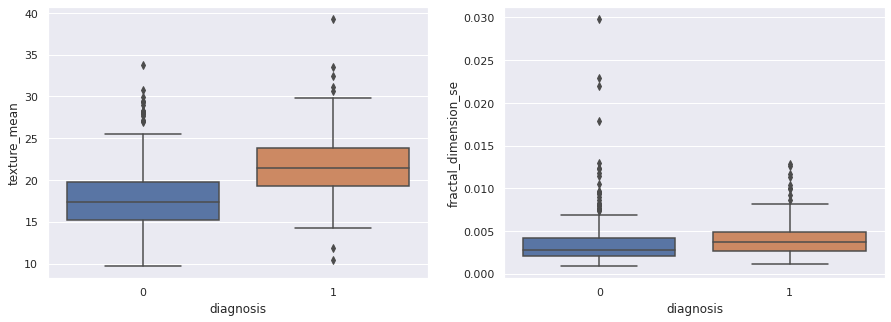

In [ ]:
#@title **code** Can you support diagnosis from such variables?
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x="diagnosis", y="texture_mean", data=data_breast)
plt.subplot(1,2,2)
sns.boxplot(x="diagnosis", y="fractal_dimension_se", data=data_breast)

<AxesSubplot:xlabel='diagnosis', ylabel='fractal_dimension_se'>

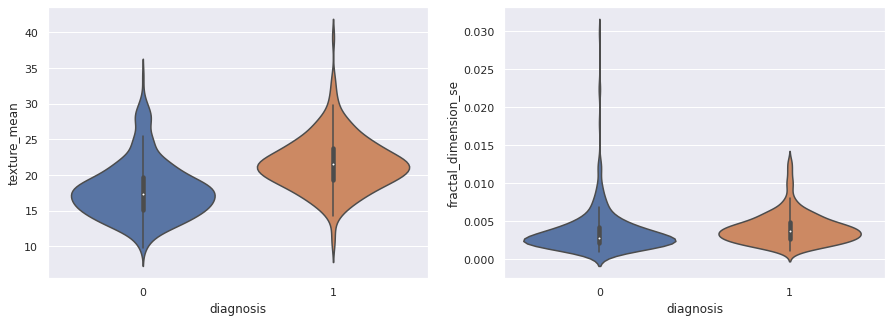

In [ ]:
#@title **code**  We can better analyze from violinplots!
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.violinplot(x="diagnosis", y="texture_mean", data=data_breast)
plt.subplot(1,2,2)
sns.violinplot(x="diagnosis", y="fractal_dimension_se", data=data_breast)

We can "simply" compute pdf and cdf and to _"code a rule"_ to decide if the sample belongs to a malignant or benign diagnosis. 

- Suppose that we have the result of a patient with texture mean of = 17.43. (patient id 246). From this result which class correspond?

- Suppose that we have the result of a patient with texture mean of = 22.91. (patient id 118). From this result which class correspond?


**which class (bening or malignant) do you think they belong to? with what probability?**

In [ ]:
#@title  **code**

import numpy as np
import scipy.stats as stats

index_benign = 246 #@ param {type:"integer"}
index_malign = 118 #@ param {type:"integer"}

gt_diag_B = data_breast.diagnosis[index_benign]
t_b_sample = data_breast.texture_mean[index_benign]
t_m_sample = data_breast.texture_mean[index_malign]
gt_diag_M =  data_breast.diagnosis[index_malign]


text_m = data_breast.texture_mean[data_breast.diagnosis ==1]
text_b   = data_breast.texture_mean[data_breast.diagnosis ==0]
text_m_dis =  stats.norm(loc=np.mean(text_m), scale=np.std(text_m))
text_b_dis =  stats.norm(loc=np.mean(text_b), scale=np.std(text_b))
lower_bound = text_m_dis.ppf(0.01); upper_bound = text_m_dis.ppf(0.99)
x, tx_M_cont = np.linspace(lower_bound, upper_bound, 100, retstep=True)
lb = text_b_dis.ppf(0.01); ub = text_b_dis.ppf(0.99)
xb, tx_B_cont = np.linspace(lb, ub, 100, retstep=True)
print('sum 1 the prob', np.sum(tx_M_cont*text_m_dis.pdf(x)))
print('sum 1 the prob', np.sum(tx_B_cont*text_b_dis.pdf(xb)))


def classification_from_stat(text_sample):
  est_b = tx_B_cont*text_b_dis.pdf(text_sample)
  est_m = tx_M_cont*text_m_dis.pdf(text_sample)
  print('est_b: ', est_b, 'est_m: ', est_m)
  class_est = 0 if est_b>est_m else  1
  return class_est


# first classification example
print("estimated class: ", classification_from_stat(t_b_sample), "the ground truth: ", gt_diag_B)

# second classification example
print("estimated class: ", classification_from_stat(t_m_sample), "the ground truth: ", gt_diag_M)

sum 1 the prob 0.9812297466603902
sum 1 the prob 0.9812297466603902
est_b:  0.01861116184057725 est_m:  0.010156881616526298
estimated class:  0 the ground truth:  0
est_b:  0.008561548388983027 est_m:  0.017658921282359238
estimated class:  1 the ground truth:  1


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

We can do the same with the fractal variable. 
- Code a function that compute the prediction of diagnosis class, according to the larger probability with respect to the malignant and benign distributions of `fractal_dimension_se`

** How confident are these results?

In [ ]:
#@title **code student**

#@title **code professor**

index_benign = 246#@ param {type:"integer"}
index_malign = 118#@ param {type:"integer"}

gt_diag_B = data_breast.diagnosis[index_benign]
t_b_sample = data_breast.fractal_dimension_se[index_benign]
t_m_sample = data_breast.fractal_dimension_se[index_malign]
gt_diag_M =  data_breast.diagnosis[index_malign]

def classification_from_stat(text_sample):
  import numpy as np
  import scipy.stats as stats
  data_breast = pd.read_csv('data/breast_cancer.csv')
  data_breast.diagnosis.replace(to_replace='M', value=1, inplace=True)
  data_breast.diagnosis.replace(to_replace='B', value=0, inplace=True)  
  data_breast = data_breast.sample(frac=1)

  #Lista con datos malignos y benignos, separados
  fract_m = data_breast.fractal_dimension_se[data_breast.diagnosis==1]
  fract_b = data_breast.fractal_dimension_se[data_breast.diagnosis==0]

  # construir las distribuciones de probabilidad
  frac_m_dis = stats.norm(loc=np.mean(fract_m), scale=np.std(fract_m))
  frac_b_dis = stats.norm(loc=np.mean(fract_b), scale=np.std(fract_b))
  lb_fm = frac_m_dis.ppf(0.01); ub_fm = frac_m_dis.ppf(0.99)
  lb_fb = frac_b_dis.ppf(0.01); ub_fb = frac_b_dis.ppf(0.99)

  xm, f_M_cont = np.linspace(lb_fm, ub_fm, 100, retstep=True)
  xb, f_B_cont = np.linspace(lb_fb, ub_fb, 100, retstep=True)

  est_b = f_B_cont*frac_b_dis.pdf(text_sample)
  est_m = f_M_cont*frac_m_dis.pdf(text_sample)
  class_est = 0 if est_b>est_m else  1
  return class_est



# first classification example
print("estimated class: ", classification_from_stat(t_b_sample), "the ground truth: ", gt_diag_B)

# second classification example
print("estimated class: ", classification_from_stat(t_m_sample), "the ground truth: ", gt_diag_M)

estimated class:  0 the ground truth:  0
estimated class:  0 the ground truth:  1


# **2.Central Limit Theorem (CLT)**


How much the original breast cancer data belongs to a normal distributions?

- We can run an experiment with multiple samples, to observe how distribution of the mean is approximated to a **Gaussian distribution**

- We need to take some theretical but useful things!!...
- We need to know which means the  **mean**: the expected value
- Then we compute the distribution of multiple means: **The CLT**
- Wewill know about `iid` referred to as independent and identically distributed


<AxesSubplot:ylabel='Probability'>

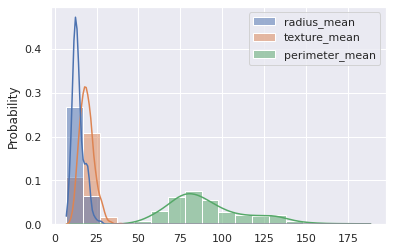

In [ ]:
#@title **code**
subset_variables = list(data_breast.columns)[2:5]
sns.histplot(data=data_breast[subset_variables], kde=True,stat='probability')

### **2.2 Central Limit Theorem**

The probability distribution of the mean of i.i.d random variables with finite variance is close to a **normal distribution** the the population size increase. 

A summary to proof central limit theorem is: 

1. Take a sample of size N=2 from any distribution
2. Compute the **sample mean**
3. Repeat 100 times

4. Plot the distribution of the **sample mean**
5. Repeat for N=4,10,30

**Agregations of i.i.d. random variables are distributed as a Gaussian**:

$$\frac{X_1 + X_2 + ... + X_N}{N} \sim \mathcal{N} \left ( \mu(X), \frac{\sigma(X)}{\sqrt{N}} \right )$$

**i.i.d** if each random variable has the same distribution and all of them are mutually independent.

The central limit theorem allows us use statistics of samples without know about particular shape distribution of the population. 

See an example to built a Gaussian distribution from a Poisson distribution

Now...
We can built an estimation of a Gaussian distribution of the mean experiments for our variable malingnant of interest. 

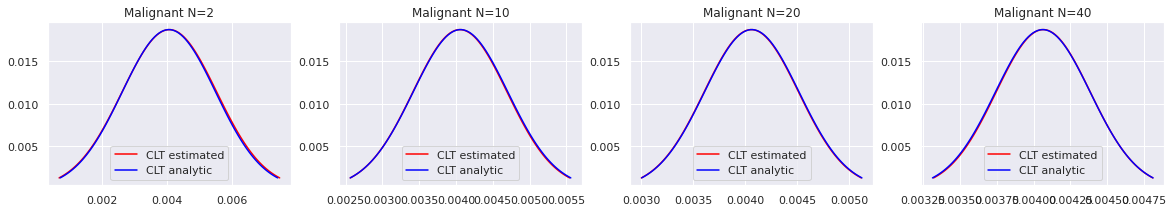

In [ ]:
#@title **code**
plt.figure(figsize=(20,3))
text_m = data_breast.fractal_dimension_se[data_breast.diagnosis ==1]
text_b   = data_breast.fractal_dimension_se[data_breast.diagnosis ==0]
d_mean = np.mean(text_m)
d_std  = np.std(text_m)

for i,N in enumerate([2,10,20, 40]):
  sample_means_m = []
  sample_means_m = np.r_[[np.mean(np.random.choice(text_m, size=N)) for _ in range(10000)]]

  plt.subplot(1,4,i+1)

  estimat_c = stats.norm(loc=np.mean(sample_means_m), scale=np.std(sample_means_m))
  x_ref_estim, ref_cont_estim = np.linspace(estimat_c.ppf(0.01), estimat_c.ppf(0.99), 100, retstep=True)
  plt.plot(x_ref_estim, ref_cont_estim*estimat_c.pdf(x_ref_estim), label="CLT estimated", color="red")


  analyt_c = stats.norm(loc=d_mean, scale=d_std/np.sqrt(N))
  x_ref_analy, ref_cont_analy = np.linspace(analyt_c.ppf(0.01), analyt_c.ppf(0.99), 100, retstep=True)
  plt.plot(x_ref_analy, ref_cont_analy*analyt_c.pdf(x_ref_analy), label="CLT analytic", color="blue")


  
  plt.title("Malignant N=%d"%N)  
  plt.legend()



 <img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Create Gaussian distribution of means for Malignant and bening fractal distributions

In [ ]:
#@title  **code student**




**How confident are these results?? ..coming soon !**

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;">
